[ Info: Saved animation to C:\Users\marin\Documents\UNI\DA\Lab6\malthus.gif


Plots.AnimatedGif("C:\\Users\\marin\\Documents\\UNI\\DA\\Lab6\\malthus.gif")
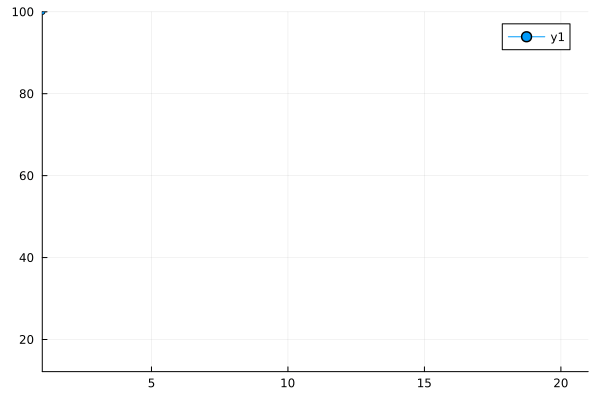

In [1]:
using Plots

function malthus(start, b, c, t)
    a = b - c
    x = Vector{Float64}([start])
    for t in 1:t
        push!(x, a * x[end])
    end
    return x
end

p = malthus(100, 1.4, 0.5, 20)

anim = @animate for i in 1:length(p)
    plot(1:i, p[1:i], markersize=3, markershape=:circle, xlims=(1, length(p)), ylims=(last(p), p[1]))
end

gif(anim, "malthus.gif")

[ Info: Saved animation to C:\Users\marin\Documents\UNI\DA\Lab6\malthus2.gif


Plots.AnimatedGif("C:\\Users\\marin\\Documents\\UNI\\DA\\Lab6\\malthus2.gif")
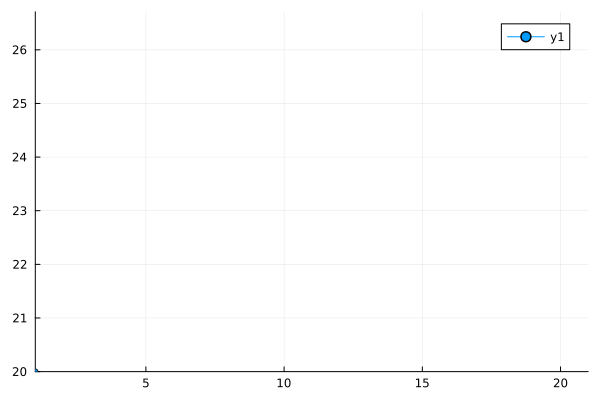

In [2]:
function malthus2(start, r, k, t, dt)
    x = Vector{Float64}([start])
    for t in 1:t
        deltax = r * x[end] * (1 - x[end] / k) * dt
        push!(x, x[end] + deltax)
    end
    return x
end

p2 = malthus2(20, 0.2, 85, 20, 0.1)

anim2 = @animate for i in 1:length(p2)
    plot(1:i, p2[1:i], markersize=3, markershape=:circle, xlims=(1, length(p2)), ylims=(p2[1], last(p2)))
end

gif(anim2, "malthus2.gif")

[ Info: Saved animation to C:\Users\marin\Documents\UNI\DA\Lab6\SIR1.gif


Plots.AnimatedGif("C:\\Users\\marin\\Documents\\UNI\\DA\\Lab6\\SIR1.gif")
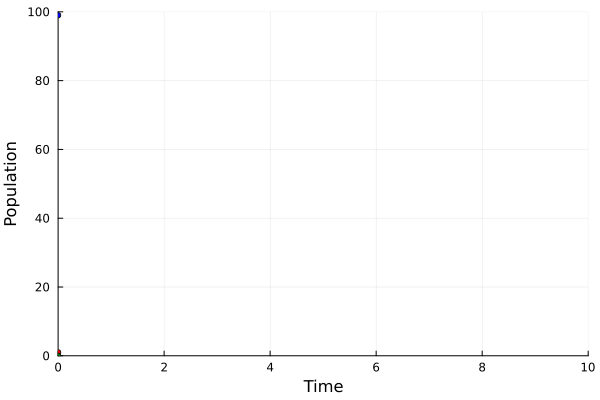

In [3]:
using Random

function kermack_mckendrick(N, I0, R0, β, γ, T)
    S0 = N - I0 - R0
    I = Vector{Float64}([I0])
    R = Vector{Float64}([R0])
    S = Vector{Float64}([S0])
    t = 0.0
    dt = 0.1

    while t < T
        if t + dt > T
            dt = T - t
        end

        new_infections = β * S[end] * I[end] / N
        new_recoveries = γ * I[end]

        S_new = S[end] - new_infections
        I_new = I[end] + new_infections - new_recoveries
        R_new = R[end] + new_recoveries

        push!(S, S_new)
        push!(I, I_new)
        push!(R, R_new)

        t += dt
    end

    return S, I, R
end


N = 100
I0 = 1.0
R0 = 0.0
β = 0.3
γ = 0.1
T = 10
S, I, R = kermack_mckendrick(N, I0, R0, β, γ, T)

t = range(0, T, length=length(S))
plot(xlabel="Time", ylabel="Population")

anim3 = @animate for i = 1:length(S)
    plot!([t[1:i]], [S[1:i]], color=:blue, ylims=(0, N), xlims=(0, last(t)))
    scatter!([t[i]], [S[i]], markersize=3, color=:blue, legend=false)
    
    plot!([t[1:i]], [I[1:i]], color=:red)
    scatter!([t[i]], [I[i]], markersize=3, color=:red, legend=false)
    
    plot!(t[1:i], R[1:i], color=:green)
    scatter!([t[i]], [R[i]], markersize=3, color=:green, legend=false)
end
    
gif(anim3, "SIR1.gif")

[ Info: Saved animation to C:\Users\marin\Documents\UNI\DA\Lab6\SEIR1.gif


Plots.AnimatedGif("C:\\Users\\marin\\Documents\\UNI\\DA\\Lab6\\SEIR1.gif")
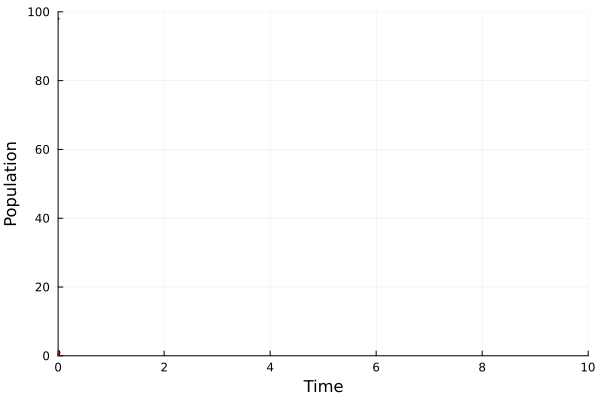

In [4]:
function seir_model(N, E0, I0, R0, β, σ, γ, T)
    S0 = N - E0 - I0 - R0
    E = Vector{Float64}([E0])
    I = Vector{Float64}([I0])
    R = Vector{Float64}([R0])
    S = Vector{Float64}([S0])
    t = 0.0
    dt = 0.1

    while t < T
        if t + dt > T
            dt = T - t
        end

        new_exposed = β * S[end] * I[end] / N
        new_infections = σ * E[end]
        new_recoveries = γ * I[end]

        S_new = S[end] - new_exposed
        E_new = E[end] + new_exposed - new_infections
        I_new = I[end] + new_infections - new_recoveries
        R_new = R[end] + new_recoveries

        push!(S, S_new)
        push!(E, E_new)
        push!(I, I_new)
        push!(R, R_new)

        t += dt
    end

    return S, E, I, R
end

N = 100
E0 = 1.0
I0 = 1.0
R0 = 0.0
β = 0.3
σ = 0.2
γ = 0.1
T = 10

S, E, I, R = seir_model(N, E0, I0, R0, β, σ, γ, T)

t = range(0, T, length=length(S))
plot(xlabel="Time", ylabel="Population")

anim4 = @animate for i = 1:length(S)
    plot!([t[1:i]], [S[1:i]], color=:blue, ylims=(0, N), xlims=(0, last(t)))
    scatter!([t[i]], [S[i]], markersize=1, color=:blue, legend=false)
        
    plot!([t[1:i]], [E[1:i]], color=:orange)
    scatter!([t[i]], [E[i]], markersize=2, color=:orange, legend=false)
    
    plot!([t[1:i]], [I[1:i]], color=:red)
    scatter!([t[i]], [I[i]], markersize=2, color=:red, legend=false)
    
    plot!(t[1:i], R[1:i], color=:green)
    scatter!([t[i]], [R[i]], markersize=2, color=:green, legend=false)
end
    
gif(anim4, "SEIR1.gif")

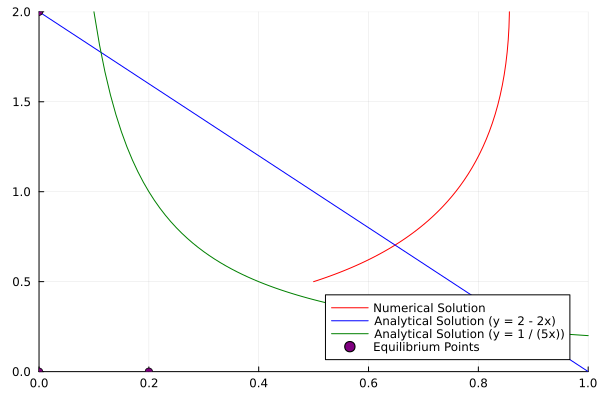

In [5]:
function lotka_volterra(x, y, a, c, d)
    dx = a * x - c * x * y
    dy = -x + d * x * y
  
    return dx, dy
end

function simulate_lotka_volterra(x₀, y₀, a, c, d, dt, steps)
    x = zeros(steps)
    y = zeros(steps)
    x[1], y[1] = x₀, y₀
  
    for i in 2:steps
        dx, dy = lotka_volterra(x[i-1], y[i-1], a, c, d)
        x[i] = x[i-1] + dx * dt
        y[i] = y[i-1] + dy * dt
    end
    
    return x, y
end

a = 2.0
c = 1.0
d = 5.0
x₀ = 0.5
y₀ = 0.5
dt = 0.01
steps = 1000

x, y = simulate_lotka_volterra(x₀, y₀, a, c, d, dt, steps)

x_analytical = 0:0.01:1
y1_analytical = 2 .- 2*x_analytical
y2_analytical = 1 ./ (5*x_analytical)

p = plot(xlims=(0, 1), ylims=(0, 2), legend=:bottomright)
plot!(x, y, color="red", label="Numerical Solution")
plot!(x_analytical, y1_analytical, color="blue", label="Analytical Solution (y = 2 - 2x)")
plot!(x_analytical, y2_analytical, color="green", label="Analytical Solution (y = 1 / (5x))")
scatter!([0, 0, 1/5], [0, 2, 0], color="purple", label="Equilibrium Points")

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1
[ Info: Saved animation to C:\Users\marin\Documents\UNI\DA\Lab6\otb.gif


Plots.AnimatedGif("C:\\Users\\marin\\Documents\\UNI\\DA\\Lab6\\otb.gif")
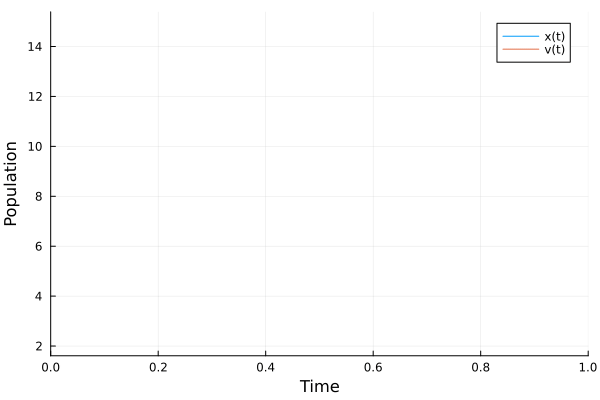

[ Info: Saved animation to C:\Users\marin\Documents\UNI\DA\Lab6\phase1.gif


Plots.AnimatedGif("C:\\Users\\marin\\Documents\\UNI\\DA\\Lab6\\phase1.gif")
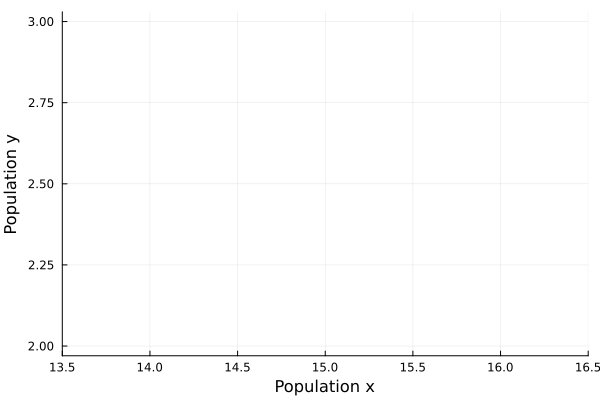

In [6]:
using DifferentialEquations

function competitive_selection!(du, u, p, t)
    alfa, betta = p
    du[1] = alfa * u[1] - betta * u[1] * u[2]
    du[2] = -alfa * u[2] + betta * u[1] * u[2]
end

alfa = 0.1
betta = 0.02
x0 = 15.0
y0 = 2.0


u0 = [x0, y0]
tspan = (0.0, 200.0)
p = [alfa, betta]

prob = ODEProblem(competitive_selection!, u0, tspan, p)
sol = solve(prob)

anim5 = @animate for i in 1:length(sol)
    plot(sol[1:i], label=["x(t)" "v(t)"], xlabel="Time", ylabel="Population")
end

anim6 = @animate for i in 1:length(sol)
    plot(sol[1:i], vars=(1,2), xlabel="Population x", ylabel="Population y", label="")
end

display(gif(anim5, "otb.gif"))

gif(anim6, "phase1.gif")

[ Info: Saved animation to C:\Users\marin\Documents\UNI\DA\Lab6\osc1.gif


Plots.AnimatedGif("C:\\Users\\marin\\Documents\\UNI\\DA\\Lab6\\osc1.gif")
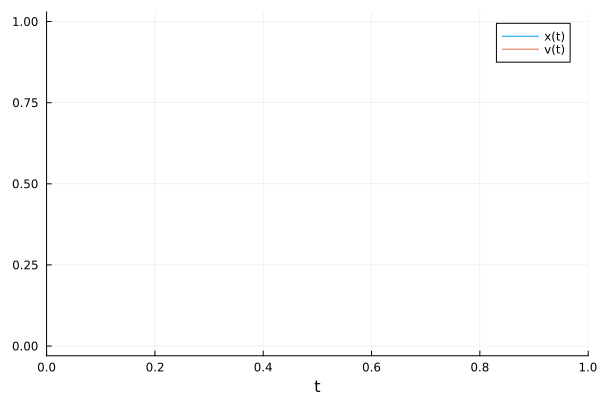

[ Info: Saved animation to C:\Users\marin\Documents\UNI\DA\Lab6\phase2.gif


Plots.AnimatedGif("C:\\Users\\marin\\Documents\\UNI\\DA\\Lab6\\phase2.gif")
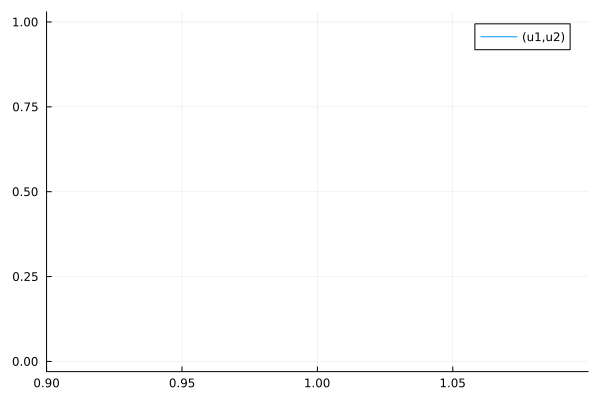

In [7]:
function harmonic_oscillator!(du, u, p, t)
    du[1] = u[2]
    du[2] = -p[1]^2 * u[1]
end

w0 = 2.0
t0 = 0.0
x0 = 1.0
y0 = 0.0
u0 = [x0, y0]
tspan = (t0, 10.0)
p = Vector{Float64}([w0])

prob = ODEProblem(harmonic_oscillator!, u0, tspan, p)
sol = solve(prob)

anim5 = @animate for i in 1:length(sol)
    plot(sol[1:i], label=["x(t)" "v(t)"])
end

anim6 = @animate for i in 1:length(sol)
    plot(sol[1:i], vars=(1,2))
end

display(gif(anim5, "osc1.gif", fps = 10))
display(gif(anim6, "phase2.gif", fps = 100))

[ Info: Saved animation to C:\Users\marin\Documents\UNI\DA\Lab6\osc2.gif


Plots.AnimatedGif("C:\\Users\\marin\\Documents\\UNI\\DA\\Lab6\\osc2.gif")
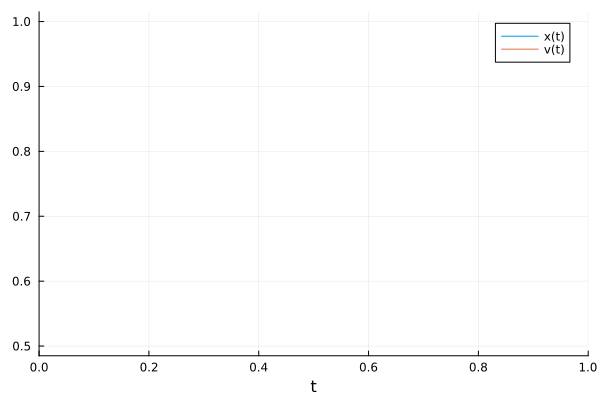

[ Info: Saved animation to C:\Users\marin\Documents\UNI\DA\Lab6\phase3.gif


Plots.AnimatedGif("C:\\Users\\marin\\Documents\\UNI\\DA\\Lab6\\phase3.gif")
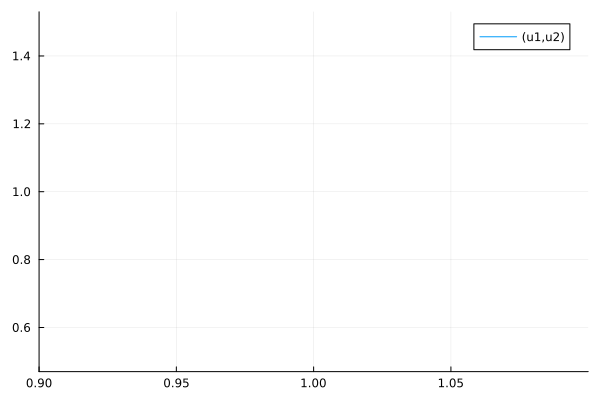

In [8]:
function damped_harmonic_oscillator!(du, u, p, t)
    du[1] = u[2]
    du[2] = -2.0 * p[2] * u[2] - p[1]^2 * u[1]
end

w0 = 2.0
γ = 0.1
t0 = 0.0
x0 = 1.0
y0 = 0.5
u0 = [x0, y0]
tspan = (t0, 20.0)
p = [w0, γ]

prob = ODEProblem(damped_harmonic_oscillator!, u0, tspan, p)
sol = solve(prob)

anim7 = @animate for i in 1:length(sol)
    plot(sol[1:i], label=["x(t)" "v(t)"])
end

anim8 = @animate for i in 1:length(sol)
    plot(sol[1:i], vars=(1,2))
end
display(gif(anim7, "osc2.gif", fps = 10))
display(gif(anim8, "phase3.gif", fps = 100))